In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class State(TypedDict):
    name: str
    age: str
    final: str

### first node action
def first_node_action(state: State) -> State:
    state['final'] = f"Hi {state['name']}!"
    return state

### second node action
def second_node_action(state:State) -> State:
    state['final'] += f" You are {state['age']} years old."
    return state

In [3]:
#create a graph and add the nodes

graph = StateGraph(State)

graph.add_node(node="add_name",action=first_node_action)
graph.add_node(node="add_age",action=second_node_action)

# add the edges
graph.add_edge(start_key="add_name",end_key="add_age")

# set starting and ending points
graph.set_entry_point(key="add_name")
graph.set_finish_point(key="add_age")

#compile the graph

app = graph.compile()

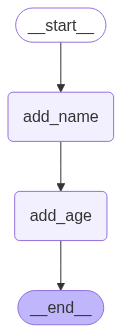

In [4]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"name":"Ahmed","age":"23"})
result

{'name': 'Ahmed', 'age': '23', 'final': 'Hi Ahmed! You are 23 years old.'}